# Text Pattern Analysis #

In [1]:
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import punkt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pylab as pl

**Function Definitions**

In [2]:
def cleanString(incomingString):
 # Purpose: Cleans the input string.
 # Add or remove statements below as necessary depending on how much cleaning needs to be done.
    newstring = incomingString
    #newstring = re.sub('<[^>]*>', '' , newstring)
    newstring = newstring.lower()
    newstring = newstring.encode('ascii', 'ignore').decode('latin-1')
    newstring = newstring.replace('!','')
    newstring = newstring.replace('@','')
    newstring = newstring.replace('#','')
    newstring = newstring.replace('%','')
    newstring = newstring.replace('^','')
    newstring = newstring.replace('&','and')
    newstring = newstring.replace('*','')
    newstring = newstring.replace('(','')
    newstring = newstring.replace('$','')
    newstring = newstring.replace(')','')
    newstring = newstring.replace('+','')
    newstring = newstring.replace('=','')
    newstring = newstring.replace('?','')
    newstring = newstring.replace('\'','')
    newstring = newstring.replace('\'','')
    newstring = newstring.replace('{','')
    newstring = newstring.replace('}','')
    newstring = newstring.replace('[','')
    newstring = newstring.replace(']','')
    newstring = newstring.replace('<','')
    newstring = newstring.replace('>','')
    newstring = newstring.replace('~','')
    newstring = newstring.replace('`','')
    newstring = newstring.replace(':','')
    newstring = newstring.replace(';','')
    newstring = newstring.replace('|','')
    newstring = newstring.replace('\\','')
    newstring = newstring.replace('/','')
    newstring = newstring.replace('-','')
    newstring = newstring.replace('_','')
    #newstring = newstring.replace('br','')
    newstring = newstring.replace(',','')
    newstring = newstring.replace('.','')
    return newstring

In [3]:
def createStopWords():
    #define the Stop words used
    stopWords = (stopwords.words('english'))
    #remove_words = ['us/eastern']
    #stopWords.update(remove_words)
    return stopWords

In [4]:
def fileDataLoad(filename, sheetname):
    #load data from Excel File
    #eventually add a variable to check for multiple data types...
    inputDF = pd.read_excel(filename, sheet_name=sheetname)
    return inputDF

**Collect Raw Data**

In [5]:
#using my test star wars dataset
filename = 'data/Star Wars Data Samples/starwars_data.xlsx'
sheetname = 'Sheet1'

In [6]:
inputDF = fileDataLoad(filename,sheetname)

In [7]:
#FUTURE: Concatenate Columns from Dataframe into a single text blob
# Create a Backup version of the Input Dataframe for testing purposes...
inputBU = inputDF.copy()

**Transform the Text Data**

Extract the Text data from the dataframe, clean the Text, Tokenize the Text and insert back into the Input Dataframe

In [8]:
# Extract the Summary data from the dataframe into a list
TextReviewList = inputDF.loc[:,'Summary'].tolist()

#Create a "clean" list to hold the cleaned strings
TextCleanList = []

# Clean the strings from TextReviewList and copy the clean strings to TextCleanList
for str in TextReviewList:
    TextCleanList.append(cleanString(str))
    
# adds a new column to the inputDF to hold the cleaned summary text
inputDF['CleanText'] = ''

# merge the cleaned summary back into the input dataframe
inputDF['CleanText'] = pd.Series(TextCleanList).values

In [9]:
#need more information about what this does...
vectorizer = TfidfVectorizer(stop_words='english', analyzer = 'word')
tfidf_matrix = vectorizer.fit_transform(inputDF.loc[:,'CleanText'].tolist())

In [10]:
#need more information about what this does...
vector_dict = {}
vector_dict = vectorizer.vocabulary_
#print(tfidf_matrix.toarray())
km_array = tfidf_matrix.toarray()

In [11]:
# how many clusters should be generated?
num_clusters = 5

#print string not really needed...
print (f'{num_clusters} clusters will be generated')

5 clusters will be generated


In [12]:
#need more information about what this does...
km = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10, max_iter=100, random_state = 42)
km.fit(tfidf_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [13]:
# importing the cluster # to a list
clusters = km.labels_.tolist()

# Adding the cluster # to a new column in the Input dataframe
inputDF['Cluster_num'] = clusters

#Displays the Data distribution by cluster
grp = inputDF.groupby('Cluster_num').count()
print (grp)

             Title  Summary  CleanText
Cluster_num                           
0                2        2          2
1                4        4          4
2                2        2          2
3                1        1          1
4                1        1          1


In [14]:
pca = PCA(n_components=2).fit(km_array.data)
pca_2d = pca.transform(km_array.data)

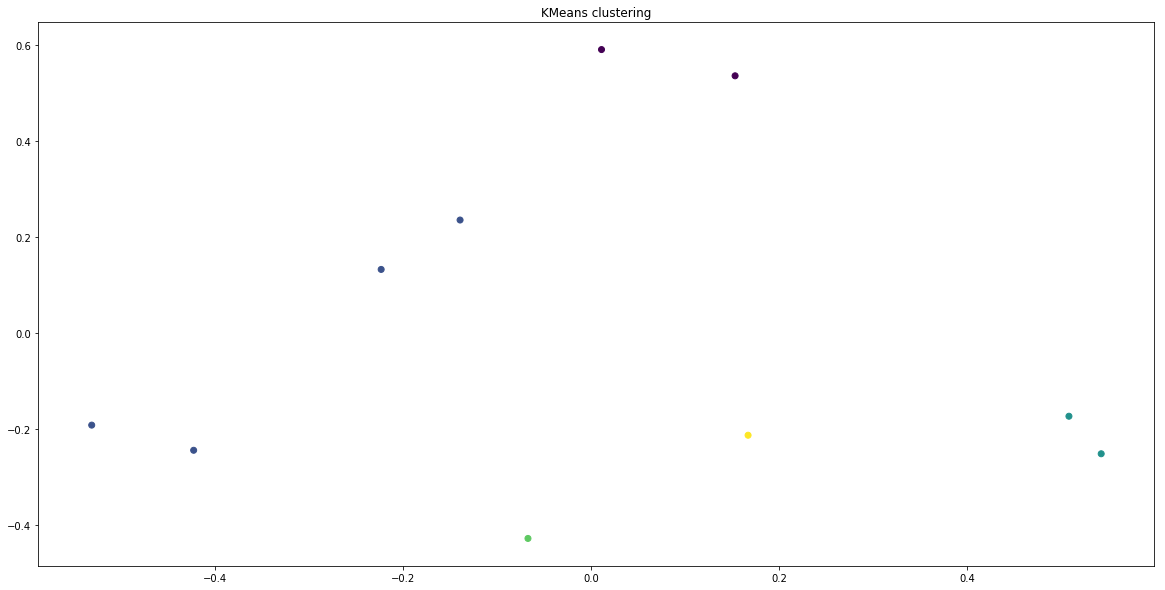

In [15]:
pl.figure(figsize=(20,10))
pl.title('KMeans clustering')

clr = ['b','g','r','c','m','y','k']
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=km.labels_)
pl.show()

**Reference Material**

https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

In [16]:
print(inputDF)

                     Title                                            Summary  \
0       The Phantom Menace  Two Jedi Knights escape a hostile blockade to ...   
1     Attack of the Clones  Ten years after initially meeting, Anakin Skyw...   
2      Revenge of the Sith  Three years into the Clone Wars, the Jedi resc...   
3                     Solo  During an adventure into the criminal underwor...   
4                Rogue One  The daughter of an Imperial scientist joins th...   
5               A New Hope  Luke Skywalker joins forces with a Jedi Knight...   
6  The Empire Strikes Back  After the rebels are brutally overpowered by t...   
7       Return of the Jedi  After a daring mission to rescue Han Solo from...   
8        The Force Awakens  Three decades after the Empire's defeat, a new...   
9            The Last Jedi  Rey develops her newly discovered abilities wi...   

                                           CleanText  Cluster_num  
0  two jedi knights escape a hostile blo

**Frequency of Words**

Need to work through this section....

1) Convert Clean text to Tokens - append to Input Dataframe

2) Count the Frequency of the Tokens - append to Input Dataframe

TF-IDF

In [17]:
stopset = set(stopwords.words('english'))

In [18]:
# Extract the Summary data from the dataframe into a list
NewList = inputDF.loc[:,'CleanText'].tolist()

In [20]:
#Create a "clean" list to hold the cleaned strings
TextTokenList = []

In [22]:
for str in NewList:
    TextTokenList.append(word_tokenize(str))

In [24]:
for review in TextTokenList:
    for word in review:
        if word in stopset:
            review.remove(word)

In [28]:
#print(TextTokenList)

In [26]:
# adds a new column to the inputDF to hold the token text
inputDF['CleanToken'] = ''

# merge the token summary back into the input dataframe
inputDF['CleanToken'] = pd.Series(TextTokenList).values

In [30]:
print(inputDF)

                     Title                                            Summary  \
0       The Phantom Menace  Two Jedi Knights escape a hostile blockade to ...   
1     Attack of the Clones  Ten years after initially meeting, Anakin Skyw...   
2      Revenge of the Sith  Three years into the Clone Wars, the Jedi resc...   
3                     Solo  During an adventure into the criminal underwor...   
4                Rogue One  The daughter of an Imperial scientist joins th...   
5               A New Hope  Luke Skywalker joins forces with a Jedi Knight...   
6  The Empire Strikes Back  After the rebels are brutally overpowered by t...   
7       Return of the Jedi  After a daring mission to rescue Han Solo from...   
8        The Force Awakens  Three decades after the Empire's defeat, a new...   
9            The Last Jedi  Rey develops her newly discovered abilities wi...   

                                           CleanText  Cluster_num  \
0  two jedi knights escape a hostile bl

https://medium.freecodecamp.org/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3

https://www.elephate.com/blog/what-is-tf-idf/

https://triton.ml/blog/tf-idf-from-scratch

https://towardsdatascience.com/tfidf-for-piece-of-text-in-python-43feccaa74f8

https://www.codementor.io/isaib.cicourel/word-frequency-in-python-e7cyzy6l9


In [32]:
FreqList = []
for lst in TextTokenList:
    for word in lst:
        FreqList.append(word)
        
print (FreqList)        

['two', 'jedi', 'knights', 'escape', 'hostile', 'blockade', 'find', 'allies', 'come', 'across', 'young', 'boy', 'may', 'bring', 'balance', 'the', 'force', 'the', 'long', 'dormant', 'sith', 'resurface', 'claim', 'old', 'glory', 'ten', 'years', 'initially', 'meeting', 'anakin', 'skywalker', 'shares', 'forbidden', 'romance', 'padm', 'amidala', 'obiwan', 'kenobi', 'investigates', 'assassination', 'attempt', 'the', 'senator', 'discovers', 'secret', 'clone', 'army', 'crafted', 'the', 'jedi', 'three', 'years', 'clone', 'wars', 'jedi', 'rescue', 'palpatine', 'count', 'dooku', 'obiwan', 'pursues', 'new', 'threat', 'anakin', 'acts', 'a', 'double', 'agent', 'the', 'jedi', 'council', 'palpatine', 'is', 'lured', 'a', 'sinister', 'plan', 'rule', 'the', 'galaxy', 'an', 'adventure', 'criminal', 'underworld', 'han', 'solo', 'meets', 'future', 'copilot', 'chewbacca', 'encounters', 'lando', 'calrissian', 'years', 'joining', 'the', 'rebellion', 'daughter', 'an', 'imperial', 'scientist', 'joins', 'rebel', 

In [33]:
CleanFreqList = []
for word in FreqList:
    if word not in stopset:
            CleanFreqList.append(word)    

In [34]:
print(CleanFreqList)

['two', 'jedi', 'knights', 'escape', 'hostile', 'blockade', 'find', 'allies', 'come', 'across', 'young', 'boy', 'may', 'bring', 'balance', 'force', 'long', 'dormant', 'sith', 'resurface', 'claim', 'old', 'glory', 'ten', 'years', 'initially', 'meeting', 'anakin', 'skywalker', 'shares', 'forbidden', 'romance', 'padm', 'amidala', 'obiwan', 'kenobi', 'investigates', 'assassination', 'attempt', 'senator', 'discovers', 'secret', 'clone', 'army', 'crafted', 'jedi', 'three', 'years', 'clone', 'wars', 'jedi', 'rescue', 'palpatine', 'count', 'dooku', 'obiwan', 'pursues', 'new', 'threat', 'anakin', 'acts', 'double', 'agent', 'jedi', 'council', 'palpatine', 'lured', 'sinister', 'plan', 'rule', 'galaxy', 'adventure', 'criminal', 'underworld', 'han', 'solo', 'meets', 'future', 'copilot', 'chewbacca', 'encounters', 'lando', 'calrissian', 'years', 'joining', 'rebellion', 'daughter', 'imperial', 'scientist', 'joins', 'rebel', 'alliance', 'risky', 'move', 'steal', 'death', 'star', 'plans', 'luke', 'skyw

In [65]:
def computeIDF(docList):
    import math
    idfDict = {}
    n = len(docList)
    
    idfDict = dict.fromkeys(docList[0], 0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1
    for word, val in idfDict.items():
        idfDict[word] = math.log10(n / float(val))
    
    return idfDict

In [66]:
IDF = computeIDF(CleanFreqList)

AttributeError: 'str' object has no attribute 'items'